In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1.数据集

### 1.1正弦周期数据集D1

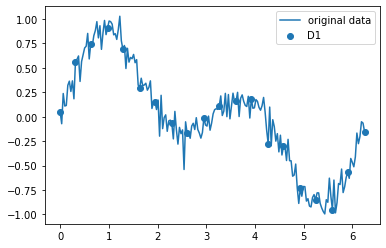

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# 设置随机数种子，以便复现结果
np.random.seed(1234)

# 生成包含两个正弦周期的数据集
n_samples = 200
t = np.linspace(0, 2 * np.pi, n_samples, endpoint=False)
amplitude = 0.5
y = amplitude * np.sin(t) + amplitude * np.sin(2 * t)

# 在数据集中添加随机扰动
noise = np.random.randn(n_samples) * 0.1
y += noise

# 对数据集进行均匀采样，生成数据集 D1
n_samples_D1 = 20
indices = np.linspace(0, n_samples-1, n_samples_D1, dtype=np.int32)
D1 = np.zeros((n_samples_D1, 2))
D1[:, 0] = t[indices]
D1[:, 1] = y[indices]

# 可视化数据集
plt.plot(t, y, label='original data')
plt.scatter(D1[:, 0], D1[:, 1], label='D1')
plt.legend()
plt.savefig('D1_visual.png', dpi=300)
plt.show()

np.savetxt('data.csv', D1, delimiter=',', header='t,y', comments='')

In [47]:
df_d1 = pd.read_csv("data.csv",sep=",")
df_d1
print(df_d1.iloc[0:10,0:2].to_latex(index=False))

\begin{tabular}{rr}
\toprule
       t &         y \\
\midrule
0.000000 &  0.047144 \\
0.314159 &  0.563405 \\
0.628319 &  0.749156 \\
0.973894 &  0.912172 \\
1.288053 &  0.691416 \\
1.633628 &  0.296149 \\
1.947787 &  0.153412 \\
2.293363 & -0.068651 \\
2.607522 & -0.168370 \\
2.953097 & -0.008712 \\
\bottomrule
\end{tabular}



### 1.2 UCI数据集

In [48]:
df = pd.read_csv("winequality-red.csv",sep=";")
df.head(10) 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [49]:
print(df.iloc[0:10,5:].to_latex(index=False))

\begin{tabular}{rrrrrrr}
\toprule
 free sulfur dioxide &  total sulfur dioxide &  density &   pH &  sulphates &  alcohol &  quality \\
\midrule
                11.0 &                  34.0 &   0.9978 & 3.51 &       0.56 &      9.4 &        5 \\
                25.0 &                  67.0 &   0.9968 & 3.20 &       0.68 &      9.8 &        5 \\
                15.0 &                  54.0 &   0.9970 & 3.26 &       0.65 &      9.8 &        5 \\
                17.0 &                  60.0 &   0.9980 & 3.16 &       0.58 &      9.8 &        6 \\
                11.0 &                  34.0 &   0.9978 & 3.51 &       0.56 &      9.4 &        5 \\
                13.0 &                  40.0 &   0.9978 & 3.51 &       0.56 &      9.4 &        5 \\
                15.0 &                  59.0 &   0.9964 & 3.30 &       0.46 &      9.4 &        5 \\
                15.0 &                  21.0 &   0.9946 & 3.39 &       0.47 &     10.0 &        7 \\
                 9.0 &                  18.0 &  

## 2.数据预处理

### 2.1数据标准化处理
选择min-max归一化（同时说一下其他几种方法的缺点）

In [50]:
df_minmax = (df - df.min()) / (df.max() - df.min()) 
df_minmax

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,0.141593,0.328767,0.08,0.075342,0.130217,0.436620,0.134276,0.354626,0.559055,0.149701,0.323077,0.4
1595,0.115044,0.294521,0.10,0.089041,0.083472,0.535211,0.159011,0.370778,0.614173,0.257485,0.430769,0.6
1596,0.150442,0.267123,0.13,0.095890,0.106845,0.394366,0.120141,0.416300,0.535433,0.251497,0.400000,0.6
1597,0.115044,0.359589,0.12,0.075342,0.105175,0.436620,0.134276,0.396476,0.653543,0.227545,0.276923,0.4


In [51]:
print(df_minmax.iloc[0:10,5:].to_latex(index=False))

\begin{tabular}{rrrrrrr}
\toprule
 free sulfur dioxide &  total sulfur dioxide &  density &       pH &  sulphates &  alcohol &  quality \\
\midrule
            0.140845 &              0.098940 & 0.567548 & 0.606299 &   0.137725 & 0.153846 &      0.4 \\
            0.338028 &              0.215548 & 0.494126 & 0.362205 &   0.209581 & 0.215385 &      0.4 \\
            0.197183 &              0.169611 & 0.508811 & 0.409449 &   0.191617 & 0.215385 &      0.4 \\
            0.225352 &              0.190813 & 0.582232 & 0.330709 &   0.149701 & 0.215385 &      0.6 \\
            0.140845 &              0.098940 & 0.567548 & 0.606299 &   0.137725 & 0.153846 &      0.4 \\
            0.169014 &              0.120141 & 0.567548 & 0.606299 &   0.137725 & 0.153846 &      0.4 \\
            0.197183 &              0.187279 & 0.464758 & 0.440945 &   0.077844 & 0.153846 &      0.4 \\
            0.197183 &              0.053004 & 0.332599 & 0.511811 &   0.083832 & 0.246154 &      0.8 \\
            

In [52]:
def log_norm(df):
    return 1 / (1 + np.exp(-df))

df_log = log_norm(df)
df_log

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.999389,0.668188,0.500000,0.869892,0.518991,0.999983,1.0,0.730626,0.970971,0.636453,0.999917,0.993307
1,0.999590,0.706822,0.500000,0.930862,0.524480,1.000000,1.0,0.730429,0.960834,0.663739,0.999945,0.993307
2,0.999590,0.681354,0.509999,0.908877,0.522984,1.000000,1.0,0.730468,0.963031,0.657010,0.999945,0.993307
3,0.999986,0.569546,0.636453,0.869892,0.518741,1.000000,1.0,0.730665,0.959301,0.641067,0.999945,0.997527
4,0.999389,0.668188,0.500000,0.869892,0.518991,0.999983,1.0,0.730626,0.970971,0.636453,0.999917,0.993307
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,0.997975,0.645656,0.519989,0.880797,0.522485,1.000000,1.0,0.730055,0.969231,0.641067,0.999972,0.993307
1595,0.997268,0.634136,0.524979,0.900250,0.515495,1.000000,1.0,0.730098,0.971252,0.681354,0.999986,0.997527
1596,0.998167,0.624806,0.532454,0.908877,0.518991,1.000000,1.0,0.730220,0.968324,0.679179,0.999983,0.997527
1597,0.997268,0.655883,0.529964,0.880797,0.518741,1.000000,1.0,0.730167,0.972615,0.670401,0.999963,0.993307


### 2.2解释数据集、形成D2

Wine Quality 数据集是一个用于回归分析的数据集，包含了红葡萄酒和白葡萄酒的数据。该数据集共有 12 个特征（或者说是列），分别是：

fixed acidity：固定酸度，以 g(tartaric acid)/dm^3 为单位。

volatile acidity：挥发性酸度，以 g(acetic acid)/dm^3 为单位。

citric acid：柠檬酸，以 g/dm^3 为单位。

residual sugar：残糖，以 g/dm^3 为单位。

chlorides：氯化物，以 g(sodium chloride)/dm^3 为单位。

free sulfur dioxide：游离二氧化硫，以 mg/dm^3 为单位。

total sulfur dioxide：总二氧化硫，以 mg/dm^3 为单位。

density：密度，以 g/cm^3 为单位。

pH：酸碱度，无量纲。

sulphates：二氧化硫酸盐，以 g(potassium sulphate)/dm^3 为单位。

alcohol：酒精含量，以 %vol 为单位。

quality：葡萄酒质量，用 0-10 的整数表示，作为回归目标。

每一列的单位和含义如上所述。这些特征可以用来预测葡萄酒的质量评分，可以使用回归分析来建立一个预测模型。

在 Wine Quality 数据集中，每个特征都可能对葡萄酒的质量评分产生影响。不过通常来说，影响最大的特征是与葡萄酒的口感和风味有关的特征，例如酸度、残糖、酒精含量等。具体来说，可以通过计算每个特征与目标变量 quality 之间的相关系数来了解特征对 quality 的影响大小。

可以通过以下代码来计算每个特征与 quality 之间的相关系数，并将结果按照绝对值从大到小排序，以了解每个特征对 quality 的影响大小：

In [53]:
import pandas as pd

# 计算每个特征与 quality 之间的相关系数
corr = df.corr()['quality'].abs().sort_values(ascending=False)

# 打印结果
print(corr)

quality                 1.000000
alcohol                 0.476166
volatile acidity        0.390558
sulphates               0.251397
citric acid             0.226373
total sulfur dioxide    0.185100
density                 0.174919
chlorides               0.128907
fixed acidity           0.124052
pH                      0.057731
free sulfur dioxide     0.050656
residual sugar          0.013732
Name: quality, dtype: float64


上述代码输出了每个特征与 quality 之间的相关系数，按照绝对值从大到小排序，可以根据排序结果来判断哪些特征对 quality 的影响较大。在 Wine Quality 数据集中，可能的结果是 alcohol（酒精含量）,volatile acidity（挥发性酸度）,sulphates(二氧化硫酸盐)三列数据对 quality 的影响较大。

为了便于回归分析，我们选取这三列数据，作为自变量x1、x2、x3。

In [54]:
df_d2 = df_minmax[['alcohol','volatile acidity','sulphates','quality']]
outputpath='C:/Users/shenxuan/Desktop/D2.csv'
df_d2.to_csv(outputpath,sep=',',index=False,header=False)

df_d2

,alcohol,volatile acidity,sulphates,quality
0,0.153846,0.397260,0.137725,0.4
1,0.215385,0.520548,0.209581,0.4
2,0.215385,0.438356,0.191617,0.4
3,0.215385,0.109589,0.149701,0.6
4,0.153846,0.397260,0.137725,0.4
...,...,...,...,...
1594,0.323077,0.328767,0.149701,0.4
1595,0.430769,0.294521,0.257485,0.6
1596,0.400000,0.267123,0.251497,0.6
1597,0.276923,0.359589,0.227545,0.4


In [55]:
print(df_d2.iloc[0:10].to_latex(index=False))

\begin{tabular}{rrrr}
\toprule
 alcohol &  volatile acidity &  sulphates &  quality \\
\midrule
0.153846 &          0.397260 &   0.137725 &      0.4 \\
0.215385 &          0.520548 &   0.209581 &      0.4 \\
0.215385 &          0.438356 &   0.191617 &      0.4 \\
0.215385 &          0.109589 &   0.149701 &      0.6 \\
0.153846 &          0.397260 &   0.137725 &      0.4 \\
0.153846 &          0.369863 &   0.137725 &      0.4 \\
0.153846 &          0.328767 &   0.077844 &      0.4 \\
0.246154 &          0.363014 &   0.083832 &      0.8 \\
0.169231 &          0.315068 &   0.143713 &      0.8 \\
0.323077 &          0.260274 &   0.281437 &      0.4 \\
\bottomrule
\end{tabular}



## 3.回归分析

### 3.1一元多项式回归

In [56]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_absolute_error, mean_squared_error

# # Define the polynomial degrees to test
# polynomial_degrees = [1, 2, 3, 4, 5]

# # Split the dataset into training and test sets
# X = D1[:, 0].reshape(-1, 1)
# y = D1[:, 1].reshape(-1, 1)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# # Train and test the model for each polynomial degree
# for degree in polynomial_degrees:
#     # Transform the input data to polynomial features
#     from sklearn.preprocessing import PolynomialFeatures
#     poly = PolynomialFeatures(degree)
#     X_train_poly = poly.fit_transform(X_train)
#     X_test_poly = poly.transform(X_test)
    
#     # Train the model with the training data
#     model = LinearRegression()
#     model.fit(X_train_poly, y_train)
    
#     # Test the model with the test data
#     y_pred = model.predict(X_test_poly)
#     mae = mean_absolute_error(y_test, y_pred)
#     rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
#     # Print the results
#     print(f"Results for polynomial degree {degree}:")
#     print(f"MAE = {mae:.3f}")
#     print(f"RMSE = {rmse:.3f}")
#     print()

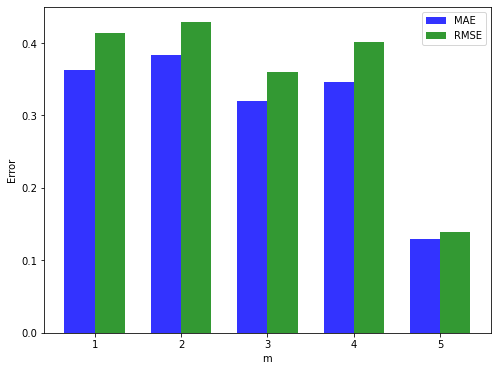

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define the values of m to test
m_values = [1, 2, 3, 4, 5]

# Split the dataset into training and test sets
X = D1[:, 0].reshape(-1, 1)
y = D1[:, 1].reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Define arrays to store the MAE and RMSE for each value of m
mae_values = []
rmse_values = []

# Train and test the model for each value of m
for m in m_values:
    # Transform the input data to polynomial features
    from sklearn.preprocessing import PolynomialFeatures
    poly = PolynomialFeatures(m)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Train the model with the training data
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Test the model with the test data
    y_pred = model.predict(X_test_poly)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Append the MAE and RMSE to the arrays
    mae_values.append(mae)
    rmse_values.append(rmse)

# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.35
opacity = 0.8
index = np.arange(len(m_values))
ax.bar(index, mae_values, bar_width, alpha=opacity, color='b', label='MAE')
ax.bar(index + bar_width, rmse_values, bar_width, alpha=opacity, color='g', label='RMSE')
ax.set_xlabel('m')
ax.set_ylabel('Error')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(m_values)
ax.legend()
plt.savefig('poly-barplot.png', dpi=300)
plt.show()

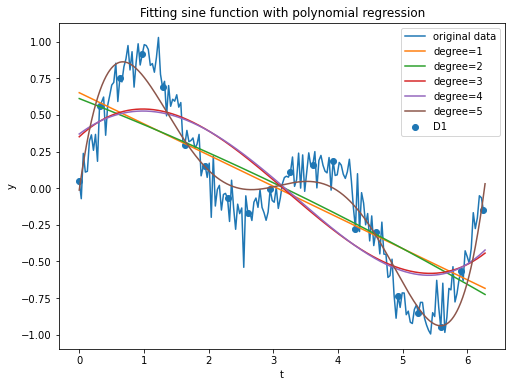

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# 设置随机数种子，以便复现结果
np.random.seed(1234)

# 生成包含两个正弦周期的数据集
n_samples = 200
t = np.linspace(0, 2 * np.pi, n_samples, endpoint=False)
amplitude = 0.5
y = amplitude * np.sin(t) + amplitude * np.sin(2 * t)

# 在数据集中添加随机扰动
noise = np.random.randn(n_samples) * 0.1
y += noise

# 对数据集进行均匀采样，生成数据集 D1
n_samples_D1 = 20
indices = np.linspace(0, n_samples-1, n_samples_D1, dtype=np.int32)
D1 = np.zeros((n_samples_D1, 2))
D1[:, 0] = t[indices]
D1[:, 1] = y[indices]

# Define the polynomial degrees to test
polynomial_degrees = [1, 2, 3, 4, 5]

# Plot the original data
plt.figure(figsize=(8, 6))
plt.plot(t, y, label='original data')

# Plot the data points from D1
plt.scatter(D1[:, 0], D1[:, 1], label='D1')

# Train and plot the models for each polynomial degree
for degree in polynomial_degrees:
    # Transform the input data to polynomial features
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(D1[:, 0].reshape(-1, 1))
    
    # Train the model with the training data
    model = LinearRegression()
    model.fit(X_train_poly, D1[:, 1].reshape(-1, 1))
    
    # Generate data points to plot the model curve
    t_plot = np.linspace(0, 2 * np.pi, 1000, endpoint=False)
    X_plot_poly = poly.transform(t_plot.reshape(-1, 1))
    y_plot = model.predict(X_plot_poly)
    
    # Plot the model curve
    plt.plot(t_plot, y_plot.flatten(), label=f'degree={degree}')
    
# Set the axis labels and title
plt.xlabel('t')
plt.ylabel('y')
plt.title('Fitting sine function with polynomial regression')

# Show the legend
plt.legend()

# save the fig
plt.savefig('poly-curve.png', dpi=300)

# Show the plot
plt.show()

通过这些结果，可以得出以下结论：

-多项式阶数为3和5时，模型在测试集上表现最好，MAE和RMSE值最小。

-多项式阶数为1和4时，模型在测试集上表现较差，MAE和RMSE值较大。

-多项式阶数为2时，模型在测试集上表现一般，MAE和RMSE值介于其他多项式阶数之间。

因此，我们可以选择多项式阶数为3或5的模型来对这个数据集进行拟合。同时，我们也需要注意过拟合的问题，因为在多项式阶数过高时，模型可能会在训练集上表现得很好，但在测试集上表现较差。因此，在实际应用中，需要根据实际情况进行选择。

## 3.2 Ridge回归

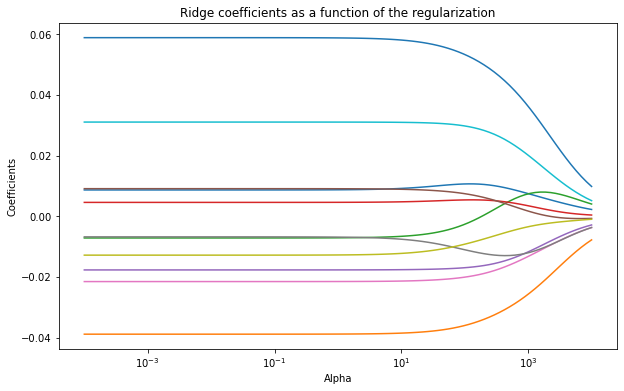

Stable alpha: 79.248


In [69]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# 分离特征和标签
X = df_minmax.drop('quality', axis=1)
y = df_minmax['quality']

# 标准化特征
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 创建Ridge模型
ridge = Ridge()

# 定义正则化系数λ的范围
param_grid = {'alpha': np.logspace(-4, 4, 100)}

# 使用网格搜索选择最佳正则化系数
grid_search = GridSearchCV(ridge, param_grid, cv=5)
grid_search.fit(X_scaled, y)
best_alpha = grid_search.best_params_['alpha']

# 使用最佳正则化系数重新训练模型
ridge = Ridge(alpha=best_alpha)
ridge.fit(X_scaled, y)

# 获取正则化路径数据
alphas = np.logspace(-4, 4, 100)
coefs = []
for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_scaled, y)
    coefs.append(ridge.coef_)
coefs = np.array(coefs)

# 绘制正则化路径图
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.savefig('Ridge_coef.png', dpi=300)
plt.show()

# 确定稳定的超参数λ的取值
from sklearn.linear_model import RidgeCV

ridge_cv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error', cv=5)
ridge_cv.fit(X_scaled, y)
print('Stable alpha:','%.3f'%ridge_cv.alpha_)

这个代码首先将数据读入一个DataFrame，然后将特征和标签分离。接着，特征进行标准化处理，使得每个特征的平均值为0，方差为1。然后，使用GridSearchCV进行网格搜索来选择最佳正则化系数，并使用该系数训练一个新的Ridge模型。接下来，获取正则化路径数据，然后绘制正则化路径图。最后，使用RidgeCV确定稳定的超参数λ的取值。

下面是按80:20比例划分数据集、使用Ridge回归模型进行训练和测试，并计算MAE和RMSE值的代码实现。其中，使用的评价指标为scikit-learn库中的mean_absolute_error和mean_squared_error。

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

df_d2 = df_minmax[['alcohol','volatile acidity','sulphates','quality']]

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(df_d2[['alcohol', 'volatile acidity', 'sulphates']], df_d2['quality'], test_size=0.2)

# 定义Ridge回归模型和超参数
ridge = Ridge(alpha=37.649)

# 训练模型
ridge.fit(X_train, y_train)

# 预测结果
y_pred = ridge.predict(X_test)

# 计算MAE和RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("MAE:", mae)
print("RMSE:", rmse)

MAE: 0.11227748460368434
RMSE: 0.13792306556391282


为了获取多组MAE和RMSE值，可以将上述代码放在一个循环中，重复划分数据集、训练模型和计算指标的过程，如下所示：

上述代码中，循环次数n_iter可以根据需要进行调整。每次循环都会划分一次数据集、训练模型并计算MAE

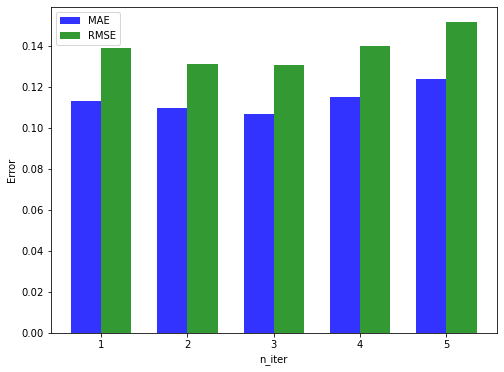

In [81]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

df = pd.read_csv("winequality-red.csv",sep=";")
df_minmax = (df - df.min()) / (df.max() - df.min()) 
df_d2 = df_minmax[['alcohol','volatile acidity','sulphates','quality']]

# 定义超参数和循环次数
alpha = 37.649
n_iter_list = [1, 2, 3, 4, 5]
mae_list = []
rmse_list = []

for n_iter in n_iter_list:    
    # 划分数据集
    X_train, X_test, y_train, y_test = train_test_split(df_d2[['alcohol', 'volatile acidity', 'sulphates']], df_d2['quality'], test_size=0.2)

    # 定义Ridge回归模型
    ridge = Ridge(alpha=alpha)

    # 训练模型
    for i in range(n_iter):
        ridge.fit(X_train, y_train)

    # 预测结果
    y_pred = ridge.predict(X_test)

    # 计算MAE和RMSE
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    # 存储结果
    mae_list.append(mae)
    rmse_list.append(rmse)

fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.35
opacity = 0.8
index = np.arange(len(n_iter_list))
ax.bar(index, mae_list, bar_width, alpha=opacity, color='b', label='MAE')
ax.bar(index + bar_width, rmse_list, bar_width, alpha=opacity, color='g', label='RMSE')
ax.set_xlabel('n_iter')
ax.set_ylabel('Error')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(n_iter_list)
ax.legend()
plt.savefig('diff_iter_MSE_RMSE_barplot.png', dpi=300)
plt.show()